In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/casos_obitos_doencas_preexistentes_modelado2.csv", encoding = "ISO-8859-1", sep = ",")
df.head()

,idade,cs_sexo,target,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,1,FEMININO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,1,MASCULINO,0,IGNORADO,SIM,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,1,MASCULINO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,1,FEMININO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,1,FEMININO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [ ]:
inputs = df.drop('target', axis='columns')
target = df['target']

In [ ]:
df['target'].value_counts()

0    1012576
1      30152
Name: target, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_cs_sexo = LabelEncoder()
le_asma = LabelEncoder()
le_cardiopatia = LabelEncoder()
le_diabetes = LabelEncoder()
le_doenca_hematologica = LabelEncoder()
le_doenca_hepatica = LabelEncoder()
le_doenca_neurologica = LabelEncoder()
le_doenca_renal = LabelEncoder()
le_imunodepressao = LabelEncoder()
le_obesidade = LabelEncoder()
le_outros_fatores_de_risco = LabelEncoder()
le_pneumopatia = LabelEncoder()
le_puerpera = LabelEncoder()
le_sindrome_de_down = LabelEncoder()

inputs['cs_sexo_n'] = le_cs_sexo.fit_transform(inputs['cs_sexo'])
inputs['asma_n'] = le_asma.fit_transform(inputs['asma'])
inputs['cardiopatia_n'] = le_cardiopatia.fit_transform(inputs['cardiopatia'])
inputs['diabetes'] = le_diabetes.fit_transform(inputs['diabetes'])
inputs['doenca_hematologica_n'] = le_doenca_hematologica.fit_transform(inputs['doenca_hematologica'])
inputs['doenca_hepatica_n'] = le_doenca_hepatica.fit_transform(inputs['doenca_hepatica'])
inputs['doenca_neurologica_n'] = le_doenca_neurologica.fit_transform(inputs['doenca_neurologica'])
inputs['doenca_renal_n'] = le_doenca_renal.fit_transform(inputs['doenca_renal'])
inputs['imunodepressao_n'] = le_imunodepressao.fit_transform(inputs['imunodepressao'])
inputs['obesidade_n'] = le_obesidade.fit_transform(inputs['obesidade'])
inputs['outros_fatores_de_risco_n'] = le_outros_fatores_de_risco.fit_transform(inputs['outros_fatores_de_risco'])
inputs['pneumopatia_n'] = le_pneumopatia.fit_transform(inputs['pneumopatia'])
inputs['puerpera_n'] = le_puerpera.fit_transform(inputs['puerpera'])
inputs['sindrome_de_down_n'] = le_sindrome_de_down.fit_transform(inputs['sindrome_de_down'])
inputs.head()

,idade,cs_sexo,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,...,doenca_hematologica_n,doenca_hepatica_n,doenca_neurologica_n,doenca_renal_n,imunodepressao_n,obesidade_n,outros_fatores_de_risco_n,pneumopatia_n,puerpera_n,sindrome_de_down_n
0,1,FEMININO,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,...,0,0,0,0,0,0,0,0,0,0
1,1,MASCULINO,IGNORADO,SIM,2,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,...,0,0,0,0,0,0,0,0,0,0
2,1,MASCULINO,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,...,0,0,0,0,0,0,0,0,0,0
3,1,FEMININO,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,...,0,0,0,0,0,0,0,0,0,0
4,1,FEMININO,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
inputs_n = inputs.drop(['cs_sexo','asma','cardiopatia','diabetes','doenca_hematologica','doenca_hepatica','doenca_neurologica','doenca_renal','imunodepressao','obesidade','outros_fatores_de_risco','pneumopatia','puerpera','sindrome_de_down'],axis='columns')
inputs_n

,idade,cs_sexo_n,asma_n,cardiopatia_n,doenca_hematologica_n,doenca_hepatica_n,doenca_neurologica_n,doenca_renal_n,imunodepressao_n,obesidade_n,outros_fatores_de_risco_n,pneumopatia_n,puerpera_n,sindrome_de_down_n
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,3,0,2,0,0,0,0,0,0,0,0,0,0
2,1,3,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042723,113,0,0,0,0,0,0,0,0,0,0,0,0,0
1042724,114,0,0,0,0,0,0,0,0,0,0,0,0,0
1042725,114,0,0,0,0,0,0,0,0,0,0,0,0,0
1042726,117,3,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(inputs_n,target)
print(y_resampled.items(),y_resampled.shape)

<zip object at 0x7fe71ee10960> (60304,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,shuffle=True)
model = MLPClassifier(hidden_layer_sizes=(8,8),max_iter=50,tol=0.00000001,learning_rate_init=0.08,solver='lbfgs',activation='logistic',verbose=2 )

In [ ]:
model.fit(X_train,y_train)
predictions = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8811076718991819


In [ ]:
print(format(model.score(X_train, y_train)))
print(format(model.score(X_test, y_test)))

0.8831138065005212
0.8811076718991819


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


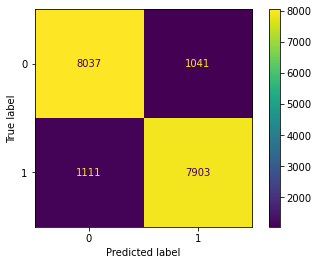

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[8037 1041]
 [1111 7903]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      9078
           1       0.88      0.88      0.88      9014

    accuracy                           0.88     18092
   macro avg       0.88      0.88      0.88     18092
weighted avg       0.88      0.88      0.88     18092

